In [1]:
# Многочлен Тейлора

In [2]:
# 1. Полиномы. Действия с полиномами
# Пример 1
import numpy as np

pol = [1, 0, 5, 7, 8, 3]
print(f'Значение полинома в точке х=-2 равно {np.polyval(pol, -2)}')

Значение полинома в точке х=-2 равно -57


In [6]:
# УПРАЖНЕНИЕ 1
pol = [1, 0, 0, -3.2, 3, 0, 3]
x0_values = [0,1,-1,4,2.2,np.pi]
pol_x0_values = []

for x0 in x0_values:
    print(f'Значение полинома в точке х0 = {x0} : {np.polyval(pol,x0)}')
    pol_x0_values.append(np.polyval(pol,x0))

Значение полинома в точке х0 = 0 : 3.0
Значение полинома в точке х0 = 1 : 3.8
Значение полинома в точке х0 = -1 : 10.2
Значение полинома в точке х0 = 4 : 3942.2
Значение полинома в точке х0 = 2.2 : 96.82630400000005
Значение полинома в точке х0 = 3.141592653589793 : 894.777921401613


In [10]:
# Пример 2
# numpy.roots
pol = [1,0,5,7,8,3]
print(f"Корни полинома равны:")
for root in np.roots(pol):
    print(f"{root : .3f} | {root}") # С ФОРМАТИРОВАНИЕМ !!!

# Пример 3
# Обратная функция к numpy.roots - numpy.poly
print('\n\n\n')
print(f"Коэффиценты полинома равны:")
for root in np.poly(np.roots(pol)):
    print(f"{root : .3f} | {root}") # С ФОРМАТИРОВАНИЕМ !!!


Корни полинома равны:
 0.759+2.283j | (0.7591961544984264+2.282705433037461j)
 0.759-2.283j | (0.7591961544984264-2.282705433037461j)
-0.500+0.866j | (-0.5000000000000007+0.8660254037844387j)
-0.500-0.866j | (-0.5000000000000007-0.8660254037844387j)
-0.518+0.000j | (-0.5183923089968512+0j)




Коэффиценты полинома равны:
 1.000 | 1.0
-0.000 | -2.220446049250313e-16
 5.000 | 4.999999999999999
 7.000 | 7.000000000000008
 8.000 | 8.000000000000012
 3.000 | 3.000000000000005


In [19]:
# УПРАЖНЕНИЕ 2
pol = [2,0,0,-3,0,0,7,0,-2]
for i in np.roots(pol): print(f"~ {i : .2f}")
print()
for i in np.poly(np.roots(pol)): print(f'{i*2 : .1f}')

~ -0.96+0.80j
~ -0.96-0.80j
~ -0.15+1.25j
~ -0.15-1.25j
~  1.09+0.47j
~  1.09-0.47j
~ -0.52+0.00j
~  0.55+0.00j

 2.0
 0.0
-0.0
-3.0
-0.0
-0.0
 7.0
 0.0
-2.0


In [31]:
# УПРАЖНЕНИЕ 3
# Для умножения полиномов используется функция numpy.convolve
# Для  деления  полиномов используется функция numpy.polydiv
# => частное + остаток (2 аргумента выходных)

p_pol = [1, 2, 0, 0, -3, 0 , 4]
q_pol = [1, 0 , -3, 0]
print(f" p * q = {np.convolve(p_pol, q_pol)}")
print(f" p / q = {np.polydiv(p_pol, q_pol) }")
q_pol = [0]*(len(p_pol) - len(q_pol)) + q_pol
sum_pol = [p_pol[i] + q_pol[i] for i in range(len(p_pol))]
print(f'Сумма : {sum_pol}')


 p * q = [  1   2  -3  -6  -3   0  13   0 -12   0]
 p / q = (array([1., 2., 3., 6.]), array([ 6., 18.,  4.]))
Сумма : [1, 2, 0, 1, -3, -3, 4]


In [34]:
def sum_of_poly(Xp, Yp):
    xl, yl = len(Xp), len(Yp)
    if xl > yl:
        Yp = [0]*(xl-yl) + Yp
        return [Xp[i] + Yp[i] for i in range(xl)]
    if xl == yl:
        return [Xp[i] + Yp[i] for i in range(xl)]
    if xl < yl:
        Xp = [0]*(yl-xl) + Xp
        return [Xp[i] + Yp[i] for i in range(yl)]

p = [1,2,0,0,-3,0,4]
q = [1,0,-3,1]
print(sum_of_poly(p,q))
print(sum_of_poly(q,p))

[1, 2, 0, 1, -3, -3, 5]
[1, 2, 0, 1, -3, -3, 5]


In [36]:
# 2. Формула Тейлора для многочленов
#    Производная многочлена - numpy.polyder

p = [1,1,1,0]
print(p)
q = np.polyder(p)
print(q)
q = np.polyder(q)
print(q)
q = np.polyder(p,2)
print(q)

[1, 1, 1, 0]
[3 2 1]
[6 2]
[6 2]


In [44]:
# УПРАЖНЕНИЕ 5
p = [1, -1, 0, -3, 0, -2]
q = [1, 0, 0, 0, 0, -3, 1]
print(f'Derrivative of p :{np.polyder(p)}')
print(f'Derrivative of q :{np.polyder(q)}')

M = np.convolve(p,q)
print(f'\nDerrivative of p * q :{np.polyder(M)}')

D, R = np.polydiv(q,p)
print(f'\nDiv = {D}\nRemainder = {R}')
print(f'Derrivative of q / p :{np.polyder(D)}')

Derrivative of p :[ 5 -4  0 -6  0]
Derrivative of q :[ 6  0  0  0  0 -3]

Derrivative of p * q :[ 11 -10   0 -24   0 -30  20  -4  27  -6   6]

Div = [1. 1.]
Remainder = [ 1.  3.  3. -1.  3.]
Derrivative of q / p :[1.]


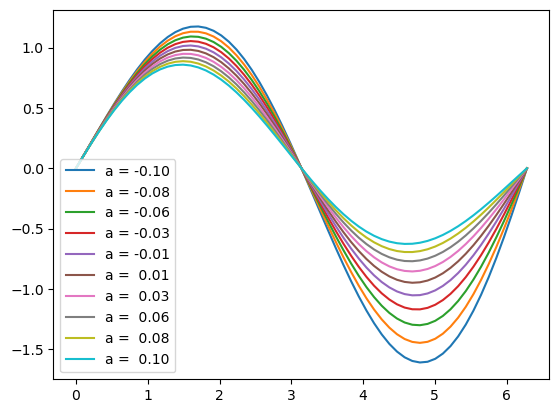

In [46]:
# НАХОЖДЕНИЕ ПРОИЗВОДНЫХ ВЫСШИХ ПОРЯДКОВ
# Пример 4
import numpy as np
import matplotlib.pyplot as plt

# y = e^(-ax) * sin(x)
x = 2 * np.pi * np.linspace(0,1, 60)
for a in 0.2 * np.linspace(0,1,10) - 0.1:
    y = np.exp(-a * x) * np.sin(x)
    plt.plot(x,y, label=f"{a = : .2f}")
plt.legend()
plt.show()

In [6]:
# УПРАЖНЕНИЕ 6
import numpy as np

def value_of_poly_der(poly, order, x0):
    pd = np.polyder(poly, order)
    return np.polyval(pd, x0)

p = [1,0,0,-1,0,0,0,0,3,0,-2]
n = 5
x0 = 0.2
print(value_of_poly_der(p,n,x0))

-91.1232


In [7]:
# Разложение полинома по степеням x - x0
'''
Полином P(x) степени n раскладывается по степеням x - x0

P(x) = b_n (x - x0)^n  +  b_n-1 (x - x0)^n-1  + ... + b_0

Где b_k = (P(x0))'(k) / k!
'''

'\nПолином P(x) степени n раскладывается по степеням x - x0\n\nP(x) = b_n (x - x0)^n  +  b_n-1 (x - x0)^n-1  + ... + b_0\n\nГде b_k = (P(x0))^k / k!\n'

In [10]:
# УПРАЖНЕНИЕ 7
from math import factorial
from sympy import Symbol, Pow
import numpy as np

def b_k(poly, k, x0):
    bk = ((np.polyval(np.polyder(poly, k), x0))) / factorial(k)
    return bk

def f(poly, x0):
    x = Symbol('x')
    k = len(poly) - 1
    p_t = []
    for i in range(k,-1,-1):
        p_t.append( f'{b_k(poly,i,x0) : .2f} * {Pow(x - x0, i)}')
    return p_t

p = [1,0,2,0,0,-3,-2]
k = len(p) - 1
x0 = [1, -2]
p_t = []
for v in x0:
    print()
    for i in f(p, v):
        print(i)




 1.00 * (x - 1)**6
 6.00 * (x - 1)**5
 17.00 * (x - 1)**4
 28.00 * (x - 1)**3
 27.00 * (x - 1)**2
 11.00 * x - 1
-2.00 * 1

 1.00 * (x + 2)**6
-12.00 * (x + 2)**5
 62.00 * (x + 2)**4
-176.00 * (x + 2)**3
 288.00 * (x + 2)**2
-259.00 * x + 2
 100.00 * 1


In [34]:
# ЗАДАНИЯ ДЛЯ САМОСТОЯТЕЛЬНОЙ РАБОТЫ
# УПРАЖНЕНИЕ С1
p = [1, 0,0,0,0,0, -1]
roots = np.roots(p)
for i in roots:
    print(f'{i : .3f}')
print()
for i in roots:
    print( f'{np.polyval(p, i) : .1f}')


-1.000+0.000j
-0.500+0.866j
-0.500-0.866j
 0.500+0.866j
 0.500-0.866j
 1.000+0.000j

-0.0+0.0j
-0.0-0.0j
-0.0+0.0j
-0.0-0.0j
-0.0+0.0j
 0.0+0.0j


In [37]:
# УПРАЖНЕНИЕ С2
p = [1,1,1]
q = [1, -1]

print(np.convolve(p,q))
print(*np.polydiv(p,q))

[ 1  0  0 -1]
[1. 2.] [3.]


In [16]:
# УПРАЖНЕНИЕ С3
from math import factorial
from sympy import Symbol, Pow
import numpy as np

def b_k(poly, k, x0):
    bk = ((np.polyval(np.polyder(poly, k), x0))) / factorial(k)
    return bk

def f(poly, x0):
    x = Symbol('x')
    k = len(poly) - 1
    p_t = []
    for i in range(k,-1,-1):
        p_t.append( f'{b_k(poly,i,x0) : .2f} * {Pow(x - x0, i)}')
    return p_t



p = [1, -2, 0, 1]
x0 = 2
for i in f(p, x0):
    print(i)

 1.00 * (x - 2)**3
 4.00 * (x - 2)**2
 4.00 * x - 2
 1.00 * 1


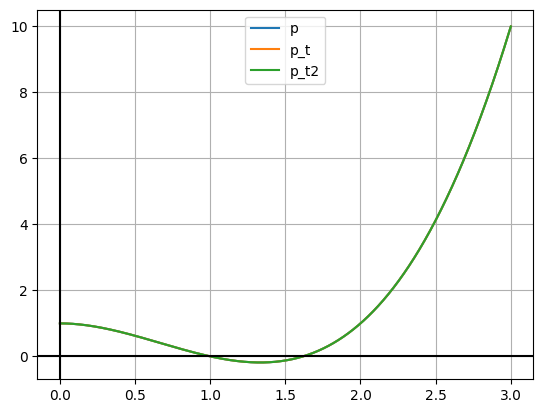

In [15]:
import matplotlib.pyplot as plt

x= np.linspace(0, 3, 2000)
plt.plot(x, x**3 - 2*x**2 + 1, label='p')
plt.plot(x, 1.00 * (x - 2)**3 +
            4.00 * (x - 2)**2 +
            4.00 * (x - 2)  + 1, label='p_t')
plt.plot(x, 1.00 * (x + 2)**3 +
           -8.00 * (x + 2)**2 +
           20.00 * (x + 2)  + -15, label='p_t2')
plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend()
plt.show()

In [17]:
# КОНТРОЛЬНЫЕ ВОПРОСЫ
'''
1) Графики многочленов Тейлора порядка n для многочлена p(x), 
    выписанные по степеням (x - x1) и (x - x2) при x1 != x2 расположены
    поверх графика самого многочлена. 
    (см. дополнение к Упражнению С3)

2) Аналогично п.1

'''

'\n1) Графики многочленов Тейлора порядка n для многочлена p(x), \n    выписанные по степеням (x - x1) и (x - x2) при x1 != x2 расположены\n    поверх графика самого многочлена. \n    (см. дополнение к Упражнению С3)\n\n2) Аналогично п.1\n\n'